# APRENDIZAJE NO SUPERVISADO

### Usando caracteristicas de animales para clasificarlos.

#### Robinson Niño Placencia

## Importo las librerias a utilizar

In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from sklearn.manifold import TSNE

## Cargo los datos

* La variable `data` contendra los datos de los features de los animales.
* La variable `labels` contendra los target.

In [7]:
data=pd.read_csv('zoo-data.csv',sep=';')
labels=pd.read_csv('zoo-labels.csv',sep=';')

## Concateno los datos en un solo dataframe

* Cooncateno los datos para tener una mejor visualizacion de los features y los targets.
* Uso `head()` para ver los primeros 5 datos del dataset.

In [11]:
data_concat = pd.concat([data, labels], axis=1)
data_concat.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,name
0,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,no,no,yes,mammal,aardvark
1,yes,no,no,yes,no,no,no,yes,yes,yes,no,no,4,yes,no,yes,mammal,antelope
2,no,no,yes,no,no,yes,yes,yes,yes,no,no,yes,0,yes,no,no,fish,bass
3,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,no,no,yes,mammal,bear
4,yes,no,no,yes,no,no,yes,yes,yes,yes,no,no,4,yes,no,yes,mammal,boar


## Analisis exploratorio de datos

* Uso `info()` para ver el tipo de datos por columna.
* Observo que a excepción del feature **legs** que es el tipo *int64*, el resto son valores tipo *object*.
* Como las variables tipo object solo toman los valores de **yes** o **no**, las modificare a valores booleanos.
* No existen valores nulos.
* Cada columna cuenta con 100 datos.

In [15]:
data_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hair      100 non-null    object
 1   feathers  100 non-null    object
 2   eggs      100 non-null    object
 3   milk      100 non-null    object
 4   airborne  100 non-null    object
 5   aquatic   100 non-null    object
 6   predator  100 non-null    object
 7   toothed   100 non-null    object
 8   backbone  100 non-null    object
 9   breathes  100 non-null    object
 10  venomous  100 non-null    object
 11  fins      100 non-null    object
 12  legs      100 non-null    int64 
 13  tail      100 non-null    object
 14  domestic  100 non-null    object
 15  catsize   100 non-null    object
 16  type      100 non-null    object
 17  name      100 non-null    object
dtypes: int64(1), object(17)
memory usage: 14.2+ KB


* Visualizo el dataset con valores binarios. Esto me servira mas adelante para el aprendizaje de maquina no supervisado.

In [18]:
data_concat.replace({'yes': 1, 'no': 0},inplace=True)
data_concat

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,name
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal,aardvark
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal,antelope
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish,bass
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal,bear
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal,boar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,mammal,wallaby
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,insect,wasp
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal,wolf
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,invertebrate,worm


## Aprendizaje de maquina no supervisado

Como el analisis se me pide identificar grupos con caracteristicas homogeneas del dataset. Primero haré un analisis no supervisado con la variable __data__.

Pero antes convertire los valores **yes** y **no** del dataset en **1** y **0**.

No realizare ninguna eliminacion de features, ya que bajo mi criterio son todas importantes a la hora de identificar los grupos de animales.

In [22]:
datos=data.replace({'yes': 1, 'no': 0})
datos

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


### Escalamiento de datos

Realizo un escalamiento de datos para que todos los features contribuyan de manera equitativa al posterior analisis de aprendizaje de maquina no supervisado.

In [26]:
#Defino la variable con la funcion que escala los datos
scaler=StandardScaler()

#Ajusto los datos
scaler.fit(datos)

#Transformo los datos
scaled_datos=scaler.transform(datos)

#Convierto los datos escalados en un dataframe
datos_sc=pd.DataFrame(scaled_datos,columns=datos.columns)

#Muestro las primeras 5 filas del dataframe escalado
datos_sc.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,0.904534,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,-1.732051,-0.386556,1.128152
1,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,-1.105542,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,0.577350,-0.386556,1.128152
2,-0.868554,-0.5,0.850963,-0.833616,-0.561951,1.362770,0.904534,0.816497,0.468521,-1.939563,-0.274352,2.209605,-1.394055,0.577350,-0.386556,-0.886405
3,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,0.904534,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,-1.732051,-0.386556,1.128152
4,1.151339,-0.5,-1.175139,1.199593,-0.561951,-0.733799,0.904534,0.816497,0.468521,0.515580,-0.274352,-0.452570,0.576341,0.577350,-0.386556,1.128152


## Clusterizacion Jerarquica

* Utilizare la clusterizacion jerarquica para ver cuantos grupos de animales me identifica por medio del agrupamiento aglomerativo.
* Decidí usar distancias euclidianas para hacer mi analisis.
* Al hacer esto, visualmente identifico 4 Grupos de animales.

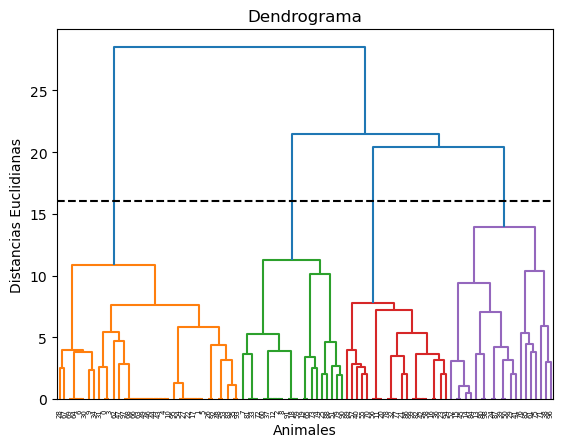

In [30]:
#La clusterizacion usada en este algoritmo es aglomerativa
#con method='ward' usamos solo distancia euclidiana
dendrogram = sch.dendrogram(sch.linkage(datos_sc, method='ward'))

#Creo una linea horizontales para poder ver los posibles clusters
plt.axhline(y=16, color='k', linestyle='--')


#Agrego detalles al plot
plt.title('Dendrograma')
plt.xlabel('Animales')
plt.ylabel('Distancias Euclidianas')
plt.show()

## Elección de K

Antes de hacer uso del algoritmo K-means, buscare el numero de clusters por medio del metodo del codo y de la silueta.

### Metodo del codo

Este método implica trazar el valor de la función de costo en función del número de clústeres y elegir el valor de K donde la disminución de la función de costo disminuye significativamente. O para simplificar, el valor de K escogido será donde la pendiente de la recta deje de cambiar significativamente.

Observo que con K=4 deja de haber un cambio significativo en la pendiente.

* De aquí en adelante me ayudo con la información obtenida de GhatGPT, junto a los algoritmos obtenidos de esta pagina https://cienciadedatos.net/documentos/py20-clustering-con-python
* Solo para aclarar, que el uso de ChatGPT solo fue para agilizar la parte del codigo. La parte analitica de este informe fue de mi autoría.

Exception in thread Thread-5 (_readerthread):
Traceback (most recent call last):
  File "C:\Users\astro\anaconda3\Lib\threading.py", line 1045, in _bootstrap_inner
    self.run()
  File "C:\Users\astro\anaconda3\Lib\threading.py", line 982, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\astro\anaconda3\Lib\subprocess.py", line 1597, in _readerthread
    buffer.append(fh.read())
                  ^^^^^^^^^
  File "C:\Users\astro\anaconda3\Lib\encodings\cp1252.py", line 23, in decode
    return codecs.charmap_decode(input,self.errors,decoding_table)[0]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
UnicodeDecodeError: 'charmap' codec can't decode byte 0x90 in position 28: character maps to <undefined>
C:\Users\astro\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
'NoneType' object has no attribute 'splitlines'
Returning the number of logi

Text(0, 0.5, 'Intra-cluster (inertia)')

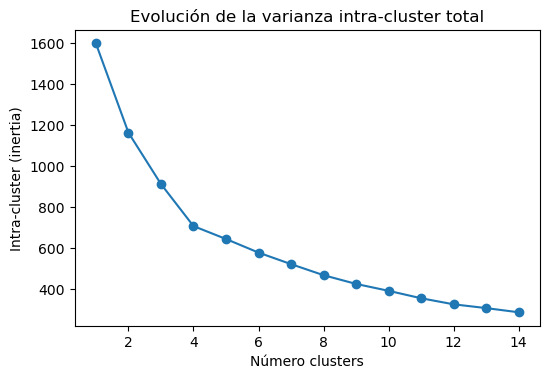

In [38]:
# Método elbow para identificar el número óptimo de clusters
# ==============================================================================

#Defino mi busqueda de K entre 1 y 14
range_n_clusters = range(1, 15)
inertias = []

#Hago un loop
#Ajusto los valores y los agrego a la lista inertias
for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(datos_sc)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)')

### Metodo de la silueta

Este método evalúa la calidad de los clústeres a través de la silueta de cada punto de datos, que es una medida de cuán similar es un punto a su clúster en comparación con los clústeres vecinos. El valor de "k" que maximiza el valor medio de la silueta de los puntos de datos se considera como el número óptimo de clústeres.

* Aquí entro en problemas, me identifica mas clusters. Los valores que me maximiza el indice de silueta son k=5,k=10,k=14.

C:\Users\astro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\astro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\astro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\astro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Text(0, 0.5, 'Media índices silhouette')

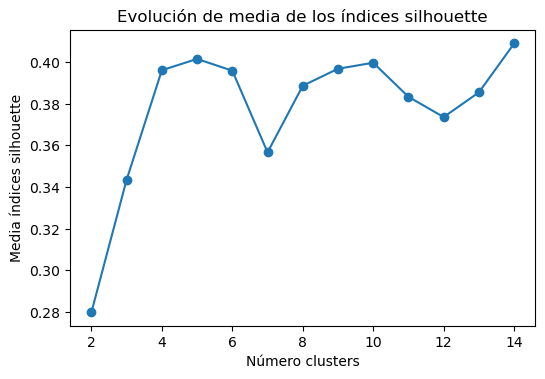

In [43]:
# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(datos_sc)
    silhouette_avg = silhouette_score(datos_sc, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette')

Finalmente, usare un **k=4**. Mi juicio se basa de lo obtenido por el metodo del codo junto al dendrograma.

## PCA

Viendo que ahora debo hacer un agrupamiento de los datos para poder identificar los grupos de animales, decidí implementar el algoritmo de reduccion de dimensionalidad PCA.
Esto ademas me ayudara a identificar patrones en un grafico de dos dimensiones.

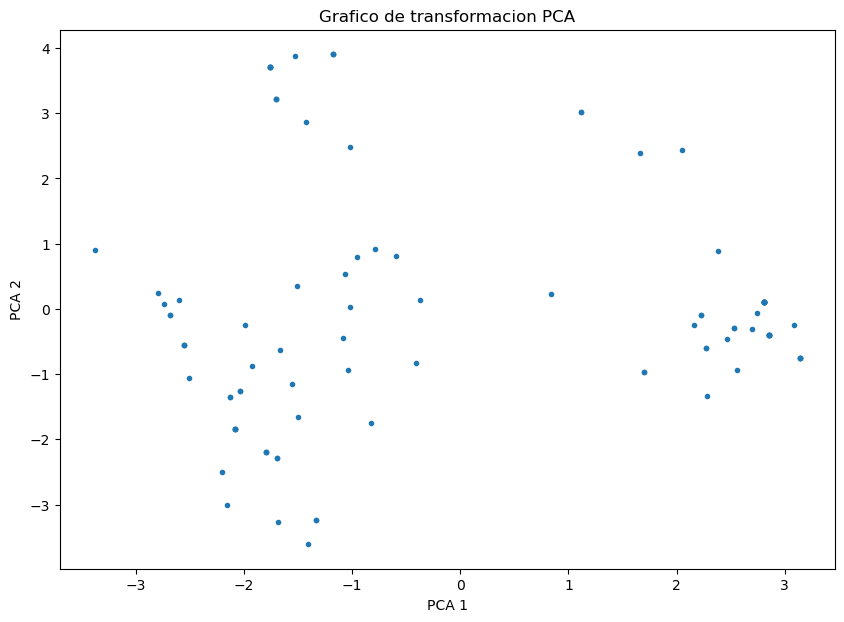

In [48]:
# Reduzco las dimensiones a 2D para visualización
pca = PCA(n_components=2)
principal_components = pca.fit_transform(datos_sc)

# Creo un DataFrame con los componentes principales
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

#Visualizo la nueva transformacion
plt.figure(figsize=(10, 7))
plt.plot(pca_df['PC1'],pca_df['PC2'],'.')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Grafico de transformacion PCA')
plt.show()


PCA no hace una eliminación de datos como tal, sino que los transforma de forma que sea mas facil de interpretar.

Ahora que ya tengo los datos graficados, procedere a buscar los clusters.

Usare tres algoritmos de aprendizaje no supervisado que son:

* K-means
* Agglomerative Clustering
* Spectral Clustering

## K-means

C:\Users\astro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


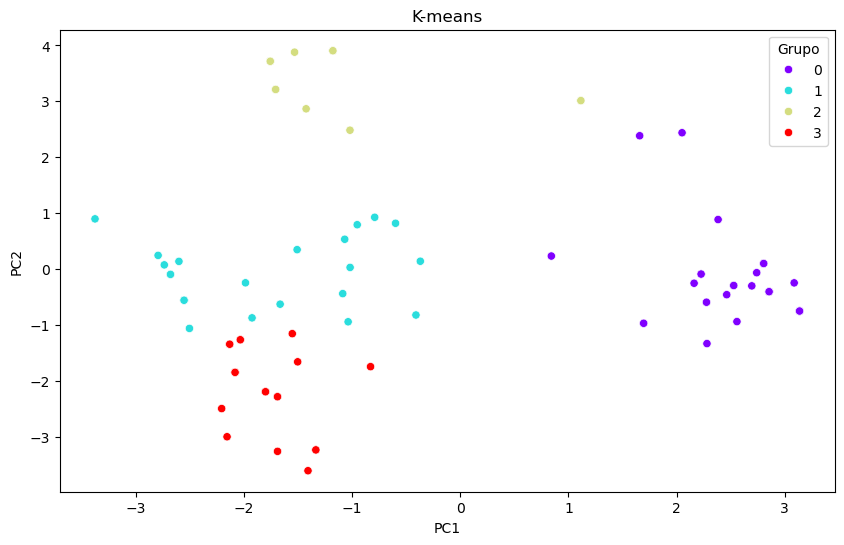

In [53]:
#Defino el modelo
modelo_kmeans = KMeans(n_clusters=4, n_init=25, random_state=123)

# Ajusto el modelo y obtengo las etiquetas de los clusters
pca_df['Grupo'] = modelo_kmeans.fit_predict(pca_df[['PC1', 'PC2']])

# Creo un scatter plot para visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(pca_df, x='PC1', y='PC2', hue='Grupo', palette='rainbow')
plt.title('K-means')
plt.show()


## Agglomerative Clustering

In [56]:
# Creo el modelo de clusterización
#El numero de clusters elegido es 4, segun el metodo del codo y el dendrograma
X=pca_df[['PC1','PC2']]
clustering = AgglomerativeClustering(n_clusters=4)  
# Ajusto el modelo a los datos
X['Grupo'] = clustering.fit_predict(X)

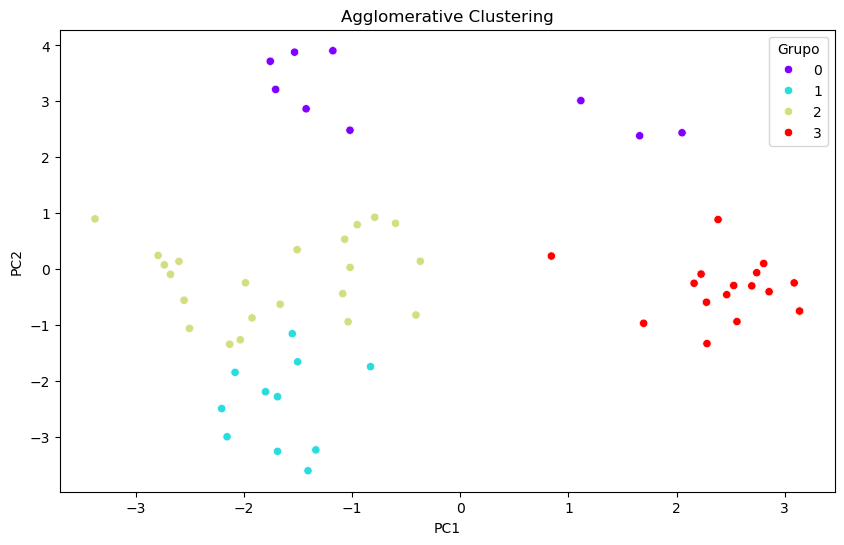

In [58]:
# Creo un scatter plot para visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(X, x='PC1', y='PC2', hue='Grupo', palette='rainbow')
plt.title('Agglomerative Clustering')
plt.show()

## Spectral Clustering

C:\Users\astro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


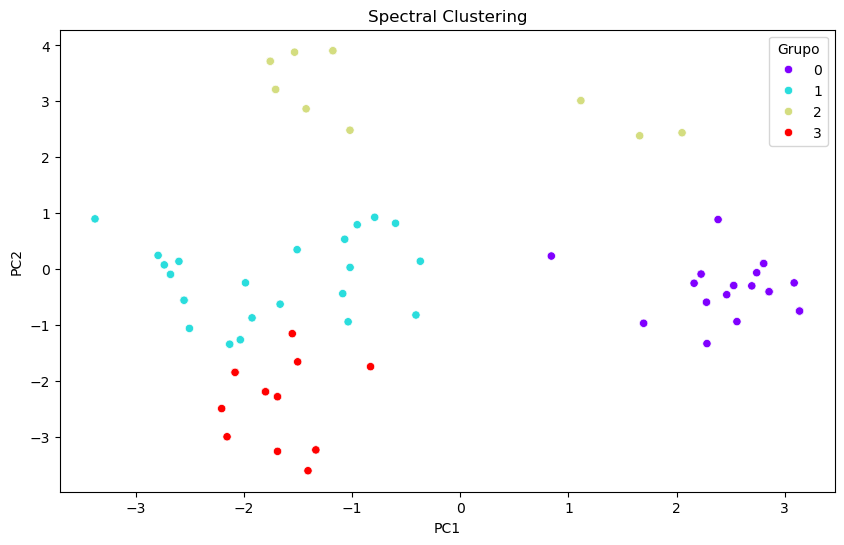

In [90]:
#Creo el modelo spectral clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)

# Ajustar el modelo y obtener las etiquetas de los clusters
pca_df['Grupo'] = spectral.fit_predict(X)

# Crear un scatter plot para visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Grupo', palette='rainbow')
plt.title('Spectral Clustering')
plt.show()



Con los 3 algoritmos de aprendizaje no supervisado obtengo resultados muy similares, pero la mayor diferencia lo observo con k-means, pero a pesar de ello esta diferencia que a primera vista es leve, me será suficiente para identificar los grupos de animales. Pero considerando que aparezcan uno o dos animales que no correspondan al grupo debido al error o la falta de entrenamiento del algoritmo.
Por lo que procedere a hacer la identificacion usando Spectral Clustering, que fue el ultimo algoritmo que ejecute.

## Identificando que tipo de animales poseen los grupos

Aquí agregare la columna **Animal** a mi dataframe escalado con la transformacion PCA.

In [95]:
pca_df['Animal']=labels['name']
pca_df

,PC1,PC2,Grupo,Animal
0,2.528614,-0.295213,0,aardvark
1,2.855673,-0.405786,0,antelope
2,-1.757239,3.716122,2,bass
3,2.528614,-0.295213,0,bear
4,2.805894,0.098102,0,boar
...,...,...,...,...
95,2.741099,-0.066198,0,wallaby
96,-1.690041,-3.262455,3,wasp
97,2.805894,0.098102,0,wolf
98,-2.034109,-1.266080,1,worm


Ahora usando un loop, veré los animales que corresponden a cada grupo.

In [98]:
# Vere los registros de cada cluster
for cluster in pca_df['Grupo'].unique():
    print(f"Grupo {cluster}:")
    print(pca_df[pca_df['Grupo'] == cluster]['Animal'].value_counts())
    print("\n")


Grupo 0:
Animal
aardvark    1
lynx        1
mole        1
mongoose    1
opossum     1
oryx        1
platypus    1
polecat     1
pony        1
puma        1
pussycat    1
raccoon     1
reindeer    1
squirrel    1
vampire     1
vole        1
wallaby     1
mink        1
lion        1
antelope    1
leopard     1
bear        1
boar        1
buffalo     1
calf        1
cavy        1
cheetah     1
deer        1
elephant    1
fruitbat    1
giraffe     1
girl        1
goat        1
gorilla     1
hamster     1
hare        1
wolf        1
Name: count, dtype: int64


Grupo 2:
Animal
bass        1
carp        1
stingray    1
sole        1
seasnake    1
sealion     1
seal        1
seahorse    1
porpoise    1
piranha     1
pike        1
herring     1
haddock     1
dolphin     1
dogfish     1
chub        1
catfish     1
tuna        1
Name: count, dtype: int64


Grupo 3:
Animal
chicken     1
dove        1
wasp        1
vulture     1
termite     1
sparrow     1
scorpion    1
pheasant    1
parakeet    1


Finalmente obtengo el siguiente analisis:

* Grupo 0: Veo que predominan los animales como el puma, el murcielago, el mapache. Estos tienen en comun ser animales **Mamiferos**.
* Grupo 2: Hay animales como focas,leon marino, pirañas, delfines etc. Estos tienen en comun en que son **animales acuaticos** o **peces**.
* Grupo 3: Hay **Aves** e **Insectos**
* Grupo 1: Hay una mezcla de todo. 

**PCA** es una buena herramienta, pero creo que en este caso no fue de mucha ayuda debido a los datos en booleano y la falta de linealidad de estos. Por lo que probare ahora haciendo una transformación por medio del algoritmo **T-SNE**.

## T-SNE

Al igual que el paso anterior usando **PCA** reducire todo a dos componentes.

In [122]:
# Inicio la transformacion usando T-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=0)
tsne_results = tsne.fit_transform(datos_sc)

# Creo un DataFrame con los resultados de T-SNE
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df

C:\Users\astro\anaconda3\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


,TSNE1,TSNE2
0,-13.730118,8.762858
1,-6.453364,6.212462
2,3.191149,-11.537415
3,-2.201813,8.554384
4,-10.255616,7.270481
...,...,...
95,-4.172191,7.286736
96,16.794025,-8.017981
97,-10.255616,7.270481
98,13.391829,-1.571787


### Ploteo los datos

Text(0.5, 1.0, 'Grafico de transformacion T-SNE')

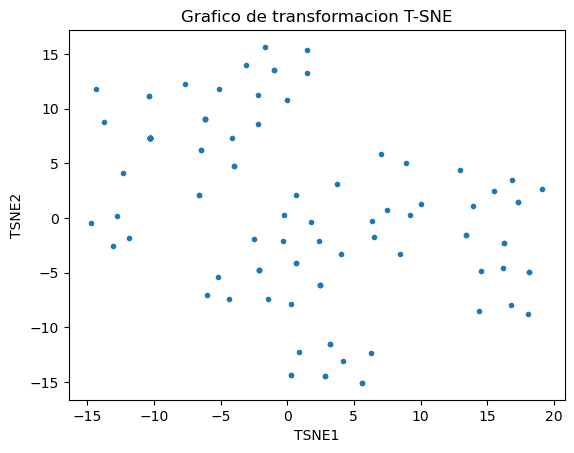

In [126]:
plt.plot(tsne_df['TSNE1'],tsne_df['TSNE2'],'.')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.title('Grafico de transformacion T-SNE')

## Spectral Clustering + T-SNE

C:\Users\astro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


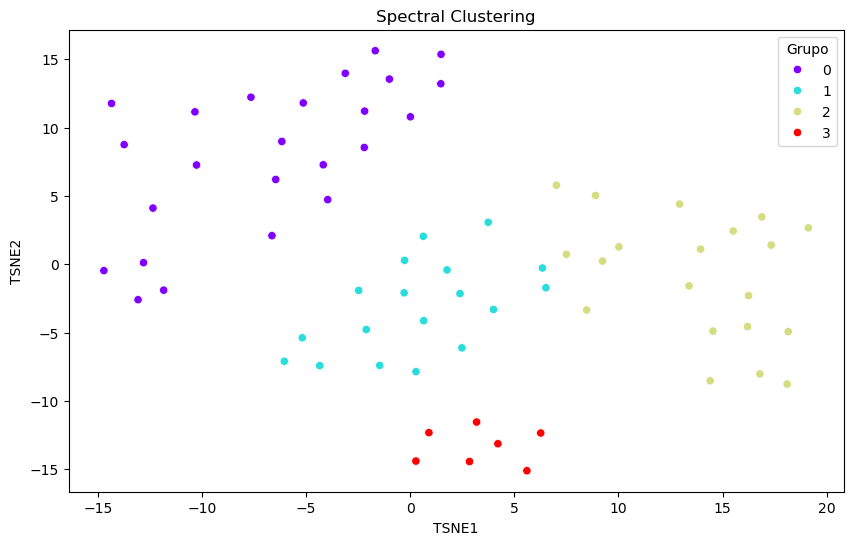

In [129]:
#Creo el modelo spectral clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=0)

tsne_df[['TSNE1','TSNE2']]

# Ajustar el modelo y obtener las etiquetas de los clusters
tsne_df['Grupo'] = spectral.fit_predict(tsne_df)

# Crear un scatter plot para visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Grupo', palette='rainbow')
plt.title('Spectral Clustering')
plt.show()


## Nuevo dataset

Creo un nuevo dataset que incluira el grupo asignado junto al nombre del animal correspondiente.

In [133]:
tsne_df['Animal']=labels['name']
tsne_df

,TSNE1,TSNE2,Grupo,Animal
0,-13.730118,8.762858,0,aardvark
1,-6.453364,6.212462,0,antelope
2,3.191149,-11.537415,3,bass
3,-2.201813,8.554384,0,bear
4,-10.255616,7.270481,0,boar
...,...,...,...,...
95,-4.172191,7.286736,0,wallaby
96,16.794025,-8.017981,2,wasp
97,-10.255616,7.270481,0,wolf
98,13.391829,-1.571787,2,worm


Finalmente veré que animales pertenecen a cada grupo con la nueva transformación.

In [143]:
# Vere los registros de cada cluster
for cluster in tsne_df['Grupo'].unique():
    print(f"Grupo {cluster}:")
    print(tsne_df[tsne_df['Grupo'] == cluster]['Animal'].value_counts())
    print("\n")

Grupo 0:
Animal
aardvark    1
mink        1
mongoose    1
opossum     1
oryx        1
platypus    1
polecat     1
pony        1
porpoise    1
puma        1
pussycat    1
raccoon     1
reindeer    1
seal        1
sealion     1
squirrel    1
vampire     1
vole        1
wallaby     1
mole        1
lynx        1
antelope    1
lion        1
bear        1
boar        1
buffalo     1
calf        1
cavy        1
cheetah     1
deer        1
dolphin     1
elephant    1
fruitbat    1
giraffe     1
girl        1
goat        1
gorilla     1
hamster     1
hare        1
leopard     1
wolf        1
Name: count, dtype: int64


Grupo 3:
Animal
bass        1
catfish     1
chub        1
dogfish     1
haddock     1
herring     1
pike        1
piranha     1
seahorse    1
sole        1
tuna        1
Name: count, dtype: int64


Grupo 1:
Animal
carp        1
chicken     1
vulture     1
tuatara     1
tortoise    1
swan        1
sparrow     1
slowworm    1
skua        1
skimmer     1
rhea        1
pheasant    1


## Conclusiones finales

Mi nueva agrupación sería la siguiente:

* Grupo 0: En su gran mayoría son animales **Mamiferos** terrestres, aunque hay un par de acuaticos y voladores como el caso del murcielago de la fruta y las focas.
* Grupo 3: En su gran mayoria son **Peces**, tambien incluye al caballo de mar.
* Grupo 1: En su gran mayoria son **Aves**, hay algunos animales de polizones como la carpa, la tortuga y el gusano. Pero es en lo minimo, era algo que ya era de esperarse.
* Grupo 2: En esta categoria encontramos **Insectos**, **Anfibios**, **Crustaceos** y **Moluscos**, el algoritmo identifico que todo lo que no entra en los grupos anteriores lo clasifica aquí. Siendo en su mayoría animales **invertebrados**.

La falta de exactitud en la clasificación puede deberse a muchos factores, como la falta de features como de datos. O que no se haya trabajado con los algoritmos mas adecuados, pero a mi juicio se logro a una buena clasificación trabajando con T-SNE junto a Spectral Clustering.
No utilice las etiquetas de clasificacion originales en en archivo zoo-labels, ya que el objetivo principal de esta prueba era que por nuestra cuenta propia podamos hacer una clasificación de los animales que comparten caracteristicas. Por lo que solo me limite a usar sus nombres.